In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [3]:
dfg = pd.read_csv('wat-r1-good.csv')
dfm = pd.read_csv('wat-r1-mal.csv')

In [4]:
dfg

,time,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,pkt_chuck,hop_count,current_hop,hop_percentage,pkt_count,pkt_max,target
0,11,2,4,0,0,3,2,8,0,0,23,7,0,4,1,0.25,6,6,1
1,83,4,2,3,0,0,4,16,18,2,0,0,0,2,1,0.50,5,6,1
2,84,4,2,3,1,1,4,16,18,2,0,0,0,2,1,0.50,4,6,1
3,85,4,2,3,2,1,4,16,18,2,0,0,0,2,1,0.50,3,6,1
4,86,4,2,3,3,1,4,16,18,2,0,0,0,2,1,0.50,2,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50107,3251376,2,4,4,1,1,2,8,0,0,27,11,10026,5,1,0.20,5,6,1
50108,3251383,2,4,4,2,1,2,8,0,0,27,11,10026,5,1,0.20,4,6,1
50109,3251390,2,4,4,3,1,2,8,0,0,27,11,10026,5,1,0.20,3,6,1
50110,3251397,2,4,4,4,2,2,8,0,0,27,11,10026,5,1,0.20,2,6,1


In [5]:
dfm

,time,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,pkt_chuck,hop_count,current_hop,hop_percentage,pkt_count,pkt_max,target
0,7,2,0,0,0,3,2,8,1,1,23,7,1,3,0,0.00,7,7,0
1,11,2,4,0,0,3,2,8,0,0,23,7,0,4,1,0.25,6,7,0
2,79,0,2,3,0,0,4,16,18,2,1,1,1,1,1,1.00,5,7,0
3,80,0,2,3,1,1,4,16,18,2,1,1,1,1,1,1.00,4,7,0
4,81,0,2,3,2,1,4,16,18,2,1,1,1,1,1,1.00,3,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71836,2022096,4,0,4,1,1,2,10,1,1,28,12,11082,5,0,0.00,1,1,0
71837,2022103,4,0,4,2,1,2,10,1,1,28,12,11082,5,0,0.00,1,1,0
71838,2022110,4,0,4,3,1,2,10,1,1,28,12,11082,5,0,0.00,1,1,0
71839,2022117,4,0,4,4,2,2,10,1,1,28,12,11082,5,0,0.00,1,1,0


In [6]:
df = dfg.append(dfm, ignore_index=True,sort=False)

In [7]:
df.isnull().sum()

time              0
outport           0
inport            0
packet_type       0
flit_id           0
flit_type         0
vnet              0
vc                0
src_ni            0
src_router        0
dst_ni            0
dst_router        0
pkt_chuck         0
hop_count         0
current_hop       0
hop_percentage    0
pkt_count         0
pkt_max           0
target            0
dtype: int64

In [8]:
df = df.sort_values('time')
df.to_csv('wat-r1-model.csv',index=False)

In [9]:
df = pd.read_csv("wat-r1-model.csv")
df

,time,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,pkt_chuck,hop_count,current_hop,hop_percentage,pkt_count,pkt_max,target
0,7,2,0,0,0,3,2,8,1,1,23,7,1,3,0,0.00,7,7,0
1,11,2,4,0,0,3,2,8,0,0,23,7,0,4,1,0.25,6,7,0
2,11,2,4,0,0,3,2,8,0,0,23,7,0,4,1,0.25,6,6,1
3,79,0,2,3,0,0,4,16,18,2,1,1,1,1,1,1.00,5,7,0
4,80,0,2,3,1,1,4,16,18,2,1,1,1,1,1,1.00,4,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121948,3251376,2,4,4,1,1,2,8,0,0,27,11,10026,5,1,0.20,5,6,1
121949,3251383,2,4,4,2,1,2,8,0,0,27,11,10026,5,1,0.20,4,6,1
121950,3251390,2,4,4,3,1,2,8,0,0,27,11,10026,5,1,0.20,3,6,1
121951,3251397,2,4,4,4,2,2,8,0,0,27,11,10026,5,1,0.20,2,6,1


In [10]:
df.corr()

,time,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,pkt_chuck,hop_count,current_hop,hop_percentage,pkt_count,pkt_max,target
time,1.000000,0.074014,0.159709,0.020008,0.011741,-0.018427,-0.051869,-0.066649,-0.087441,-0.114769,0.074026,0.073298,0.824879,0.070214,-0.014848,-0.016029,-0.150331,-0.200696,0.389627
outport,0.074014,1.000000,-0.171123,-0.202175,-0.000848,0.001332,0.322062,0.353200,-0.108217,-0.262539,-0.220954,0.019220,-0.034299,0.145624,-0.378007,-0.517566,-0.122149,-0.100077,0.217514
inport,0.159709,-0.171123,1.000000,0.008029,-0.015218,0.023901,-0.413279,-0.519149,-0.467374,-0.252404,0.464434,0.368545,-0.004617,0.483921,0.368551,0.435711,-0.102972,-0.205408,0.327446
packet_type,0.020008,-0.202175,0.008029,1.000000,0.260566,-0.409241,-0.233211,-0.266009,0.109956,0.032884,0.013865,-0.087889,0.035319,-0.088938,0.097134,0.158688,0.075662,0.019886,-0.010211
flit_id,0.011741,-0.000848,-0.015218,0.260566,1.000000,0.063704,0.155672,0.117453,0.004326,0.001608,-0.049707,-0.022620,0.009440,-0.039885,-0.027412,-0.020027,-0.063680,0.012548,0.006547
flit_type,-0.018427,0.001332,0.023901,-0.409241,0.063704,1.000000,-0.244495,-0.184470,-0.006794,-0.002526,0.078068,0.035527,-0.014827,0.062643,0.043053,0.031454,-0.064075,0.036037,-0.010283
vnet,-0.051869,0.322062,-0.413279,-0.233211,0.155672,-0.244495,1.000000,0.968482,0.610851,0.366667,-0.850456,-0.463923,-0.037561,-0.277199,0.039632,-0.041124,-0.010028,0.060417,-0.051914
vc,-0.066649,0.353200,-0.519149,-0.266009,0.117453,-0.184470,0.968482,1.000000,0.589550,0.309896,-0.840429,-0.466073,-0.038891,-0.337396,-0.076513,-0.155612,-0.006219,0.084976,-0.078345
src_ni,-0.087441,-0.108217,-0.467374,0.109956,0.004326,-0.006794,0.610851,0.589550,1.000000,0.655230,-0.766488,-0.659945,-0.034328,-0.386375,0.375835,0.365926,0.096622,0.151141,-0.119761
src_router,-0.114769,-0.262539,-0.252404,0.032884,0.001608,-0.002526,0.366667,0.309896,0.655230,1.000000,-0.424247,-0.269302,0.007587,0.139693,0.768252,0.458644,0.080277,0.077052,-0.246512


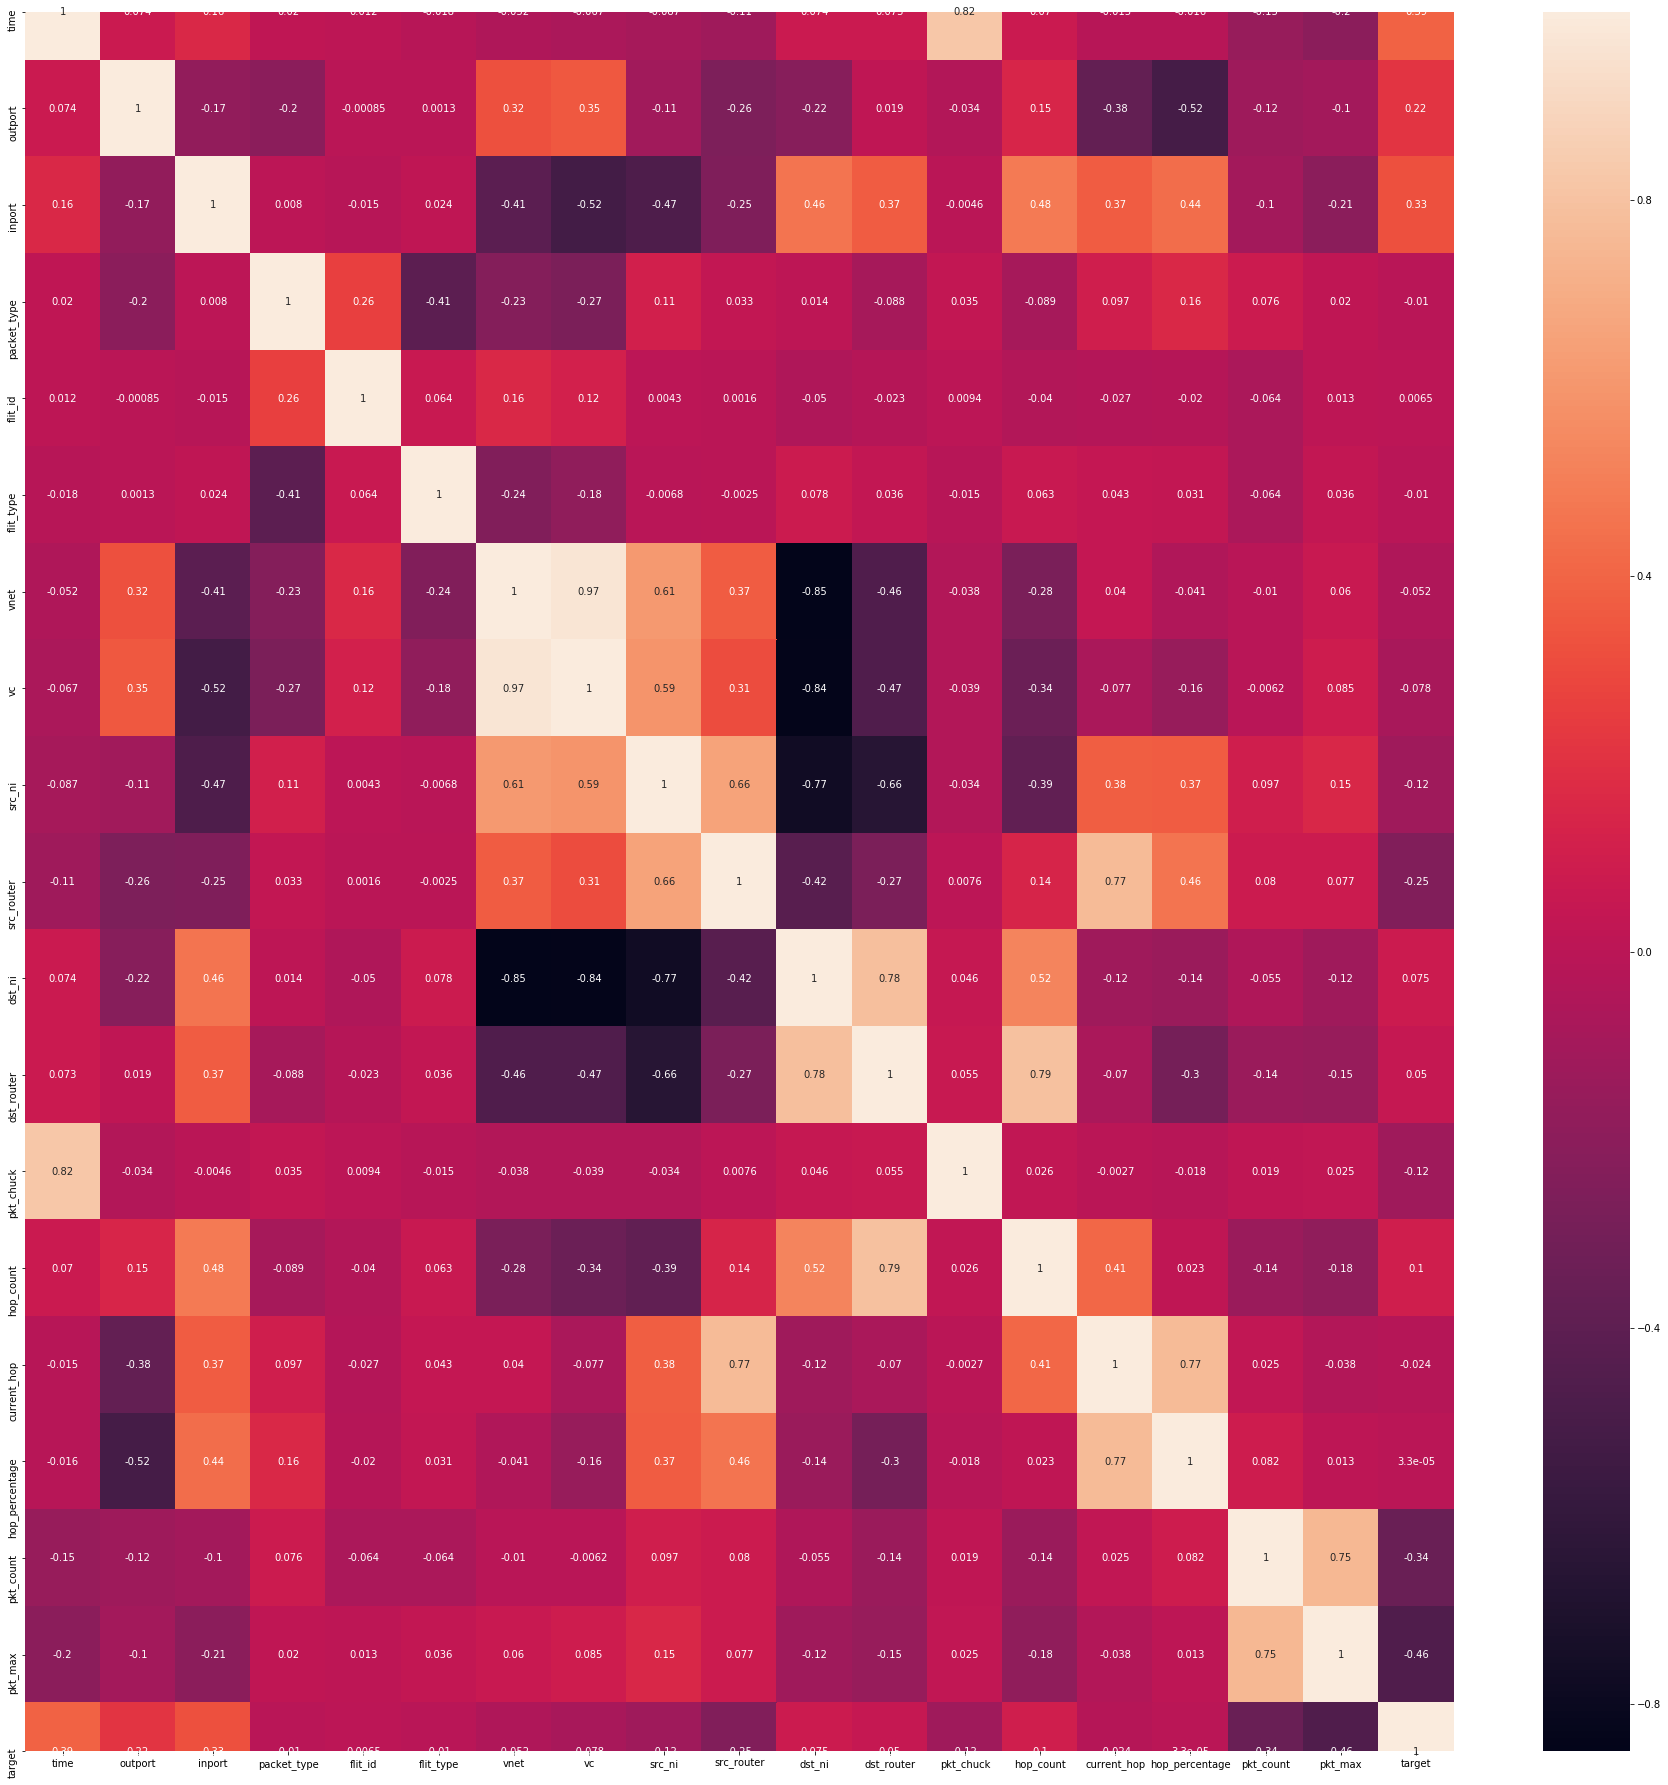

In [11]:
plt.figure(figsize=(32,32))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [12]:
train_X = df.drop(columns=['target','time'])
train_X

,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,pkt_chuck,hop_count,current_hop,hop_percentage,pkt_count,pkt_max
0,2,0,0,0,3,2,8,1,1,23,7,1,3,0,0.00,7,7
1,2,4,0,0,3,2,8,0,0,23,7,0,4,1,0.25,6,7
2,2,4,0,0,3,2,8,0,0,23,7,0,4,1,0.25,6,6
3,0,2,3,0,0,4,16,18,2,1,1,1,1,1,1.00,5,7
4,0,2,3,1,1,4,16,18,2,1,1,1,1,1,1.00,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121948,2,4,4,1,1,2,8,0,0,27,11,10026,5,1,0.20,5,6
121949,2,4,4,2,1,2,8,0,0,27,11,10026,5,1,0.20,4,6
121950,2,4,4,3,1,2,8,0,0,27,11,10026,5,1,0.20,3,6
121951,2,4,4,4,2,2,8,0,0,27,11,10026,5,1,0.20,2,6


In [13]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.5,0.0,0.000000,0.00,1.000000,0.0,0.000000,0.032258,0.066667,0.741935,0.466667,0.000090,0.500000,0.0,0.00,0.200000,0.200000
1,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.741935,0.466667,0.000000,0.666667,0.2,0.25,0.166667,0.200000
2,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.741935,0.466667,0.000000,0.666667,0.2,0.25,0.166667,0.166667
3,0.0,0.5,0.500000,0.00,0.000000,1.0,0.727273,0.580645,0.133333,0.032258,0.066667,0.000090,0.166667,0.2,1.00,0.133333,0.200000
4,0.0,0.5,0.500000,0.25,0.333333,1.0,0.727273,0.580645,0.133333,0.032258,0.066667,0.000090,0.166667,0.2,1.00,0.100000,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121948,0.5,1.0,0.666667,0.25,0.333333,0.0,0.000000,0.000000,0.000000,0.870968,0.733333,0.904629,0.833333,0.2,0.20,0.133333,0.166667
121949,0.5,1.0,0.666667,0.50,0.333333,0.0,0.000000,0.000000,0.000000,0.870968,0.733333,0.904629,0.833333,0.2,0.20,0.100000,0.166667
121950,0.5,1.0,0.666667,0.75,0.333333,0.0,0.000000,0.000000,0.000000,0.870968,0.733333,0.904629,0.833333,0.2,0.20,0.066667,0.166667
121951,0.5,1.0,0.666667,1.00,0.666667,0.0,0.000000,0.000000,0.000000,0.870968,0.733333,0.904629,0.833333,0.2,0.20,0.033333,0.166667


In [14]:
corr_df = pd.concat([train_X, df[['target']]], axis = 1)
corr_df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,target
0,1.000000,-0.171123,-0.202175,-0.000848,0.001332,0.322062,0.353200,-0.108217,-0.262539,-0.220954,0.019220,-0.034299,0.145624,-0.378007,-0.517566,-0.122149,-0.100077,0.217514
1,-0.171123,1.000000,0.008029,-0.015218,0.023901,-0.413279,-0.519149,-0.467374,-0.252404,0.464434,0.368545,-0.004617,0.483921,0.368551,0.435711,-0.102972,-0.205408,0.327446
2,-0.202175,0.008029,1.000000,0.260566,-0.409241,-0.233211,-0.266009,0.109956,0.032884,0.013865,-0.087889,0.035319,-0.088938,0.097134,0.158688,0.075662,0.019886,-0.010211
3,-0.000848,-0.015218,0.260566,1.000000,0.063704,0.155672,0.117453,0.004326,0.001608,-0.049707,-0.022620,0.009440,-0.039885,-0.027412,-0.020027,-0.063680,0.012548,0.006547
4,0.001332,0.023901,-0.409241,0.063704,1.000000,-0.244495,-0.184470,-0.006794,-0.002526,0.078068,0.035527,-0.014827,0.062643,0.043053,0.031454,-0.064075,0.036037,-0.010283
5,0.322062,-0.413279,-0.233211,0.155672,-0.244495,1.000000,0.968482,0.610851,0.366667,-0.850456,-0.463923,-0.037561,-0.277199,0.039632,-0.041124,-0.010028,0.060417,-0.051914
6,0.353200,-0.519149,-0.266009,0.117453,-0.184470,0.968482,1.000000,0.589550,0.309896,-0.840429,-0.466073,-0.038891,-0.337396,-0.076513,-0.155612,-0.006219,0.084976,-0.078345
7,-0.108217,-0.467374,0.109956,0.004326,-0.006794,0.610851,0.589550,1.000000,0.655230,-0.766488,-0.659945,-0.034328,-0.386375,0.375835,0.365926,0.096622,0.151141,-0.119761
8,-0.262539,-0.252404,0.032884,0.001608,-0.002526,0.366667,0.309896,0.655230,1.000000,-0.424247,-0.269302,0.007587,0.139693,0.768252,0.458644,0.080277,0.077052,-0.246512
9,-0.220954,0.464434,0.013865,-0.049707,0.078068,-0.850456,-0.840429,-0.766488,-0.424247,1.000000,0.784992,0.046050,0.524955,-0.115863,-0.136539,-0.055328,-0.119212,0.075178


In [15]:
pca = PCA(0.95)
pca.fit(train_X)
principal_components = pca.transform(train_X)
principal_components

array([[-0.42216611, -0.68382397,  0.42951366, ..., -0.50322265,
        -0.13589407,  0.02781791],
       [-0.84070617, -0.26085929, -0.31920228, ..., -0.42633814,
        -0.28456915,  0.12596643],
       [-0.84205072, -0.26182259, -0.32451444, ..., -0.428253  ,
        -0.28176302,  0.09816429],
       ...,
       [-0.94217804, -0.32199098, -0.50248861, ...,  0.37376469,
         0.03578812,  0.03380313],
       [-0.95114084, -0.32333195, -0.51396569, ...,  0.38422516,
         0.02898935,  0.01115924],
       [-0.96434031, -0.39398276, -0.4208453 , ...,  0.39508068,
        -0.33471046, -0.03659573]])

In [16]:
pca.explained_variance_ratio_

array([0.35785135, 0.18504547, 0.10072774, 0.08467051, 0.06813243,
       0.05322957, 0.04150916, 0.03962326, 0.03248253])

Text(0, 0.5, 'Variance')

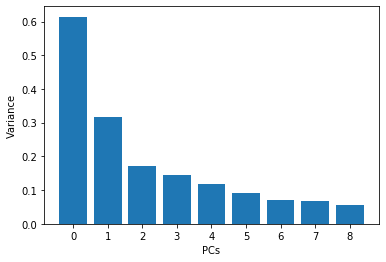

In [17]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel("PCs")
plt.ylabel("Variance")

In [18]:
principal_df = pd.DataFrame(data = principal_components)
principal_df

,0,1,2,3,4,5,6,7,8
0,-0.422166,-0.683824,0.429514,-0.490408,0.625066,0.204730,-0.503223,-0.135894,0.027818
1,-0.840706,-0.260859,-0.319202,-0.567760,0.620446,-0.054118,-0.426338,-0.284569,0.125966
2,-0.842051,-0.261823,-0.324514,-0.568553,0.619668,-0.055334,-0.428253,-0.281763,0.098164
3,0.788070,0.768684,-0.201713,-0.432725,-0.448411,-0.072221,-0.478553,-0.385683,-0.015595
4,0.779107,0.767343,-0.213190,-0.201445,-0.111643,-0.072576,-0.468092,-0.392481,-0.038239
...,...,...,...,...,...,...,...,...,...
121948,-0.967848,-0.319899,-0.415471,-0.116807,-0.235482,0.280767,0.385704,0.026331,0.057305
121949,-0.955013,-0.320945,-0.458980,0.119500,-0.196680,0.280226,0.379734,0.031060,0.045554
121950,-0.942178,-0.321991,-0.502489,0.355806,-0.157878,0.279685,0.373765,0.035788,0.033803
121951,-0.951141,-0.323332,-0.513966,0.587086,0.178890,0.279330,0.384225,0.028989,0.011159


In [19]:
final_df = pd.concat([principal_df, df[['target']]], axis = 1)
final_df

,0,1,2,3,4,5,6,7,8,target
0,-0.422166,-0.683824,0.429514,-0.490408,0.625066,0.204730,-0.503223,-0.135894,0.027818,0
1,-0.840706,-0.260859,-0.319202,-0.567760,0.620446,-0.054118,-0.426338,-0.284569,0.125966,0
2,-0.842051,-0.261823,-0.324514,-0.568553,0.619668,-0.055334,-0.428253,-0.281763,0.098164,1
3,0.788070,0.768684,-0.201713,-0.432725,-0.448411,-0.072221,-0.478553,-0.385683,-0.015595,0
4,0.779107,0.767343,-0.213190,-0.201445,-0.111643,-0.072576,-0.468092,-0.392481,-0.038239,0
...,...,...,...,...,...,...,...,...,...,...
121948,-0.967848,-0.319899,-0.415471,-0.116807,-0.235482,0.280767,0.385704,0.026331,0.057305,1
121949,-0.955013,-0.320945,-0.458980,0.119500,-0.196680,0.280226,0.379734,0.031060,0.045554,1
121950,-0.942178,-0.321991,-0.502489,0.355806,-0.157878,0.279685,0.373765,0.035788,0.033803,1
121951,-0.951141,-0.323332,-0.513966,0.587086,0.178890,0.279330,0.384225,0.028989,0.011159,1


In [20]:
final_df.corr()

,0,1,2,3,4,5,6,7,8,target
0,1.000000e+00,-1.325128e-15,-9.843453e-16,1.886471e-16,-1.503768e-16,-1.634952e-16,-2.182443e-16,1.419120e-15,-9.750443e-17,-0.127984
1,-1.325128e-15,1.000000e+00,-1.039134e-15,-6.460836e-16,1.206595e-15,-3.853667e-15,1.266400e-15,6.476491e-15,1.007585e-15,-0.072062
2,-9.843453e-16,-1.039134e-15,1.000000e+00,3.212640e-16,4.638596e-18,-2.908158e-16,5.693712e-16,1.568191e-15,9.012314e-16,-0.339331
3,1.886471e-16,-6.460836e-16,3.212640e-16,1.000000e+00,-6.225226e-15,-9.511803e-16,2.055319e-16,6.107221e-16,1.233719e-16,-0.040619
4,-1.503768e-16,1.206595e-15,4.638596e-18,-6.225226e-15,1.000000e+00,-3.986810e-16,3.074154e-16,-6.963933e-16,-4.035589e-16,0.005930
5,-1.634952e-16,-3.853667e-15,-2.908158e-16,-9.511803e-16,-3.986810e-16,1.000000e+00,1.329168e-15,4.369235e-15,6.902133e-16,-0.296341
6,-2.182443e-16,1.266400e-15,5.693712e-16,2.055319e-16,3.074154e-16,1.329168e-15,1.000000e+00,-1.142687e-15,1.249554e-15,-0.064694
7,1.419120e-15,6.476491e-15,1.568191e-15,6.107221e-16,-6.963933e-16,4.369235e-15,-1.142687e-15,1.000000e+00,-2.200485e-15,0.068576
8,-9.750443e-17,1.007585e-15,9.012314e-16,1.233719e-16,-4.035589e-16,6.902133e-16,1.249554e-15,-2.200485e-15,1.000000e+00,-0.326783
target,-1.279835e-01,-7.206237e-02,-3.393313e-01,-4.061877e-02,5.930481e-03,-2.963408e-01,-6.469427e-02,6.857558e-02,-3.267832e-01,1.000000


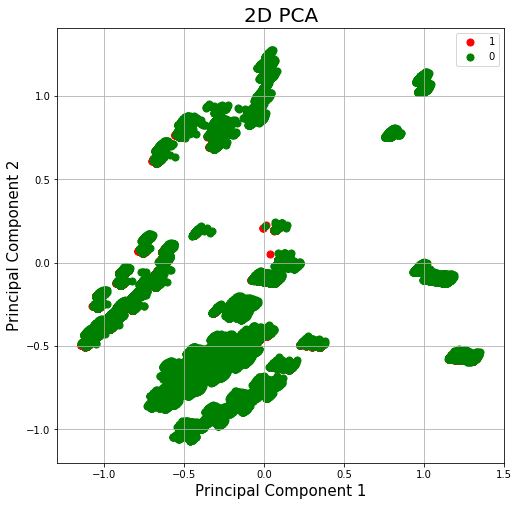

In [21]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 0]
               , final_df.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [22]:
train_Y = df['target']

In [23]:
train_Y.value_counts()

0    71841
1    50112
Name: target, dtype: int64

In [24]:
seed = 7
np.random.seed(seed)

#### machine learning models

In [25]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

In [26]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.32, random_state=seed, shuffle=True)

In [27]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [28]:
logit_model=sm.Logit(train_Y,train_X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.417744
         Iterations 10
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.383      
Dependent Variable: target           AIC:              101924.3026
Date:               2020-05-04 16:18 BIC:              102089.3963
No. Observations:   121953           Log-Likelihood:   -50945.    
Df Model:           16               LL-Null:          -82585.    
Df Residuals:       121936           LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     10.0000                                       
--------------------------------------------------------------------
        Coef.     Std.Err.      z       P>|z|     [0.025     0.975] 
--------------------------------------------------------------------
0        2.6284     0.0496    52.9667   0.0000     2.5312     2.7257
1        0.9723     0.1202     8.0875   0.00

In [29]:
logreg = LogisticRegression(C=1,penalty='l2',random_state=42)
logreg.fit(X_train, y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
y_pred = logreg.predict(X_test)
print('Accuracy {:.2f}'.format(accuracy_score(y_test,y_pred)))
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Accuracy 0.81
Train Prediction Score 81.17041288828864
Test Prediction  81.1736066623959


In [31]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[18792  4263]
 [ 3084 12886]]


In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84     23055
           1       0.75      0.81      0.78     15970

    accuracy                           0.81     39025
   macro avg       0.81      0.81      0.81     39025
weighted avg       0.81      0.81      0.81     39025



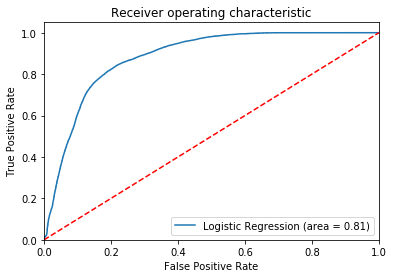

In [33]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [34]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [35]:
y_pred_knn= knn.predict(X_test)

In [36]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 90.77513023345553
Test Prediction  86.84176809737349


In [37]:
cm = confusion_matrix(y_test, y_pred_knn)
print(cm)

[[19664  3391]
 [ 1744 14226]]


In [38]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88     23055
           1       0.81      0.89      0.85     15970

    accuracy                           0.87     39025
   macro avg       0.86      0.87      0.87     39025
weighted avg       0.87      0.87      0.87     39025



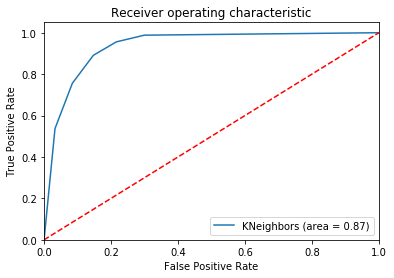

In [39]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

In [37]:
#supportvectormachines
from sklearn.svm import SVC
ksvc = SVC(kernel = 'rbf',random_state = 42,probability=True)
ksvc.fit(X_train,y_train)
y_pred_ksvc= ksvc.predict(X_test)
ksvc_score_train = ksvc.score(X_train,y_train)
print("Train Prediction Score",ksvc_score_train*100)
ksvc_score_test = accuracy_score(y_test,y_pred_ksvc)
print("Test Prediction Score",ksvc_score_test*100)
cm = confusion_matrix(y_test, y_pred_ksvc)
print(cm)
print(classification_report(y_test,y_pred_ksvc))

In [40]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [41]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [42]:
y_pred_nb= nb.predict(X_test)

In [43]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 69.04784873625314
Test Prediction Score 68.76873798846893


In [44]:
cm = confusion_matrix(y_test, y_pred_nb)
print(cm)

[[13939  9116]
 [ 3072 12898]]


In [45]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.82      0.60      0.70     23055
           1       0.59      0.81      0.68     15970

    accuracy                           0.69     39025
   macro avg       0.70      0.71      0.69     39025
weighted avg       0.72      0.69      0.69     39025



In [46]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.optimizers import SGD

Using TensorFlow backend.


In [47]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 66342 samples, validate on 16586 samples
Epoch 1/10
66342/66342 [==============================] - 8s 121us/step - loss: 0.5483 - accuracy: 0.7093 - val_loss: 0.4563 - val_accuracy: 0.7881
Epoch 2/10
66342/66342 [==============================] - 5s 82us/step - loss: 0.4420 - accuracy: 0.7945 - val_loss: 0.4304 - val_accuracy: 0.7992
Epoch 3/10
66342/66342 [==============================] - 5s 77us/step - loss: 0.4245 - accuracy: 0.8063 - val_loss: 0.4180 - val_accuracy: 0.8097
Epoch 4/10
66342/66342 [==============================] - 5s 83us/step - loss: 0.4152 - accuracy: 0.8112 - val_loss: 0.4103 - val_accuracy: 0.8114
Epoch 5/10
66342/66342 [==============================] - 5s 78us/step - loss: 0.4092 - accuracy: 0.8112 - val_loss: 0.4055 - val_accuracy: 0.8124
Epoch 6/10
66342/66342 [==============================] - 6s 94us/step - loss: 0.4052 - accuracy: 0.8109 - val_loss: 0.4042 - val_accuracy: 0.8118
Epoch 7/10
66342/66342 [==============================] - 6s 86us/s

In [48]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 80.98%


In [49]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(4, activation='relu', input_shape=(n_cols,)))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 66342 samples, validate on 16586 samples
Epoch 1/10
66342/66342 [==============================] - 5s 76us/step - loss: 0.2295 - accuracy: 0.5877 - val_loss: 0.2146 - val_accuracy: 0.5907
Epoch 2/10
66342/66342 [==============================] - 5s 68us/step - loss: 0.1970 - accuracy: 0.6943 - val_loss: 0.1787 - val_accuracy: 0.7585
Epoch 3/10
66342/66342 [==============================] - 6s 86us/step - loss: 0.1686 - accuracy: 0.7730 - val_loss: 0.1580 - val_accuracy: 0.7849
Epoch 4/10
66342/66342 [==============================] - 5s 76us/step - loss: 0.1525 - accuracy: 0.7925 - val_loss: 0.1462 - val_accuracy: 0.7995
Epoch 5/10
66342/66342 [==============================] - 5s 79us/step - loss: 0.1434 - accuracy: 0.8031 - val_loss: 0.1396 - val_accuracy: 0.8104
Epoch 6/10
66342/66342 [==============================] - 5s 76us/step - loss: 0.1383 - accuracy: 0.8124 - val_loss: 0.1356 - val_accuracy: 0.8167
Epoch 7/10
66342/66342 [==============================] - 5s 69us/st

In [50]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 81.67%


In [51]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 66342 samples, validate on 16586 samples
Epoch 1/10
66342/66342 [==============================] - 6s 92us/step - loss: 0.2438 - accuracy: 0.5874 - val_loss: 0.2418 - val_accuracy: 0.5907
Epoch 2/10
66342/66342 [==============================] - 5s 72us/step - loss: 0.2423 - accuracy: 0.5877 - val_loss: 0.2417 - val_accuracy: 0.5907
Epoch 3/10
66342/66342 [==============================] - 6s 92us/step - loss: 0.2422 - accuracy: 0.5877 - val_loss: 0.2416 - val_accuracy: 0.5907
Epoch 4/10
66342/66342 [==============================] - 6s 88us/step - loss: 0.2412 - accuracy: 0.5877 - val_loss: 0.2385 - val_accuracy: 0.5907
Epoch 5/10
66342/66342 [==============================] - 5s 73us/step - loss: 0.2349 - accuracy: 0.5879 - val_loss: 0.2288 - val_accuracy: 0.5977
Epoch 6/10
66342/66342 [==============================] - 5s 73us/step - loss: 0.2188 - accuracy: 0.6793 - val_loss: 0.2042 - val_accuracy: 0.7365
Epoch 7/10
66342/66342 [==============================] - 6s 85us/st

In [52]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 81.52%


In [ ]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 66342 samples, validate on 16586 samples
Epoch 1/30
14112/66342 [=====>........................] - ETA: 13s - loss: 0.2058 - accuracy: 0.6483

In [64]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 98.78%


In [65]:
principal_df[principal_df.duplicated()].shape

(0, 9)

In [68]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [69]:
# GridSearchCV
param_grid={'max_depth':range(0,15,2) ,
            'max_features':range(0,15,2)}
dt_g=DecisionTreeClassifier(random_state = 42)
dt_cv=GridSearchCV(dt_g,param_grid,cv=10,scoring='accuracy',n_jobs=-1)
dt_cv.fit(X_train,y_train)

print("Best parameters:",dt_cv.best_params_)
print("Accuracy :",dt_cv.best_score_)

Best parameters: {'max_depth': 14, 'max_features': 14}
Accuracy : 0.9979500202106996


In [73]:
dt = DecisionTreeClassifier(max_depth=14,max_features=14,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=14, max_features=14, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [74]:
y_pred_dt= dt.predict(X_test)

In [75]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 99.73229789697086
Test Prediction Score 99.73350416399744


In [76]:
cm = confusion_matrix(y_test, y_pred_dt)
print(cm)

[[23015    40]
 [   64 15906]]


In [77]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23055
           1       1.00      1.00      1.00     15970

    accuracy                           1.00     39025
   macro avg       1.00      1.00      1.00     39025
weighted avg       1.00      1.00      1.00     39025



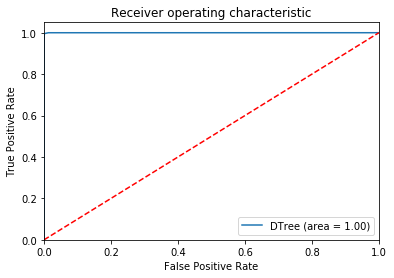

In [80]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

In [99]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# GridSearchCV
param_grid={'max_depth':range(0,15,2),
            'n_estimators':[125,250],
            'max_features':range(0,15,2)}
dt_g=RandomForestClassifier(random_state=42)
dt_cv=GridSearchCV(dt_g,param_grid,cv=10,scoring='f1_micro',n_jobs=-1)
dt_cv.fit(X_train,y_train)

print("Best parameters:",dt_cv.best_params_)
print("Accuracy :",dt_cv.best_score_)

In [ ]:
rf = RandomForestClassifier(max_depth=7,max_features=11,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

In [ ]:
y_pred_rf= dt.predict(X_test)

In [ ]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)

In [ ]:
print(classification_report(y_test,y_pred_rf))

In [ ]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

In [83]:
#xgboost
from xgboost import XGBClassifier

In [84]:
# GridSearchCV
param_grid={'max_depth':range(0,15,2),
            'n_estimators':[125,250],
           'min_child_weight':[1,3,6]}
xgb_g=XGBClassifier(random_state=42)
xgb_cv=GridSearchCV(xgb_g,param_grid,cv=10,scoring='accuracy',n_jobs=-1)
xgb_cv.fit(X_train,y_train)

print("Best parameters:",xgb_cv.best_params_)
print("Accuracy :",xgb_cv.best_score_)

Best parameters: {'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 250}
Accuracy : 0.9999758818208349


In [91]:
xgbc = XGBClassifier(max_depth=4,min_child_weight=1,n_estimators=250,random_state=42)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=250, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [92]:
y_pred_xgbc= dt.predict(X_test)

In [95]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 100.0
Test Prediction Score 99.73350416399744


In [96]:
cm = confusion_matrix(y_test, y_pred_xgbc)
print(cm)

[[23015    40]
 [   64 15906]]


In [97]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23055
           1       1.00      1.00      1.00     15970

    accuracy                           1.00     39025
   macro avg       1.00      1.00      1.00     39025
weighted avg       1.00      1.00      1.00     39025



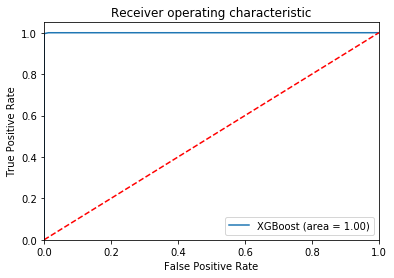

In [98]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()